In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ? Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassements d'honoraires ? Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de population pour certaines classes d'âges (bébé/pédiatre, personnes âgées / infirmiers etc...) ?

## 1. Loading Data: 

In [45]:
medecin = pd.read_csv('/home/rakotoniaina/TELECOM PARIS/Notebook/INFMDI721/lesson6/rpps_tab3.csv')
population = pd.read_csv('/home/rakotoniaina/TELECOM PARIS/Notebook/INFMDI721/lesson6/pop_par_dep_par_an_regroupe.csv',sep=';')
honoraire = pd.read_excel('/home/rakotoniaina/TELECOM PARIS/Notebook/INFMDI721/lesson6/honoraires.xls',sheet_name='Généralistes et MEP')

## 2. Cleaning :

In [46]:
population = population[population['annee']==2013]
population_dep = population.drop(columns=['annee','age_max_cat','sexe']).groupby('l_dep').sum()


In [47]:
medecin = medecin[medecin['annee']==2013]
medecin = medecin[medecin.zone_inscription.str.contains("FRANCE") == False]
medecin = medecin[medecin.zone_inscription.str.contains("DOM-COM") == False].drop(columns=['annee'])
medecin = medecin[medecin.zone_inscription.str.contains(r'[0-9]') == True]
medecin = medecin[medecin.mode_exercice.str.contains("Libéraux exclusifs") == True]

In [48]:
honoraire = honoraire[honoraire['Généralistes et compétences MEP'].str.contains("01- Médecine générale")]
honoraire = honoraire[honoraire['DEPARTEMENT'].str.contains("TOTAL") == False]
honoraire_dep = honoraire[['DEPARTEMENT','DEPASSEMENTS (Euros)']]
honoraire_dep['dep'] = honoraire['DEPARTEMENT'].str.split('- ').str[1]
honoraire_dep = honoraire_dep.drop(columns='DEPARTEMENT')
honoraire_dep_dep = honoraire_dep.set_index('dep')

/home/rakotoniaina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## 3. Analysis : 

### Médecin Généraliste:

In [49]:
Generaliste = medecin[medecin.specialite.str.contains("Généralistes") == True]

In [50]:
Generaliste_dep = Generaliste.drop(columns=['mode_exercice','specialite'])
Generaliste_dep['departement']=Generaliste_dep['zone_inscription'].str.split(' - ').str[1]
Generaliste_dep = Generaliste_dep.drop(columns='zone_inscription').set_index('departement')

In [51]:
pop_medecin = pd.concat([Generaliste_dep, population_dep,honoraire_dep_dep], axis=1, sort=False)

In [52]:
pop_medecin['ratio'] = np.log(pop_medecin['value'] / pop_medecin['effectifs'])

In [53]:
Depassement_dep = pop_medecin.dropna()

In [54]:
Depassement_dep.head()

,effectifs,value,DEPASSEMENTS (Euros),ratio
Ain,422.0,619765.0,240349,7.292090
Aisne,386.0,540756.0,204037,7.244886
Allier,298.0,342780.0,17931.8,7.047751
Hautes-Alpes,168.0,140731.0,112825,6.730642
Alpes-Maritimes,1441.0,1082494.0,4.01272e+06,6.621686


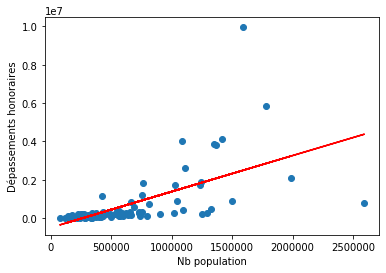

In [56]:
X_1 = Depassement_dep[['value']]
Y_1 = Depassement_dep[['DEPASSEMENTS (Euros)']]

# Regression linéaire effectifs médecin, Dépassement honoraire
Reg = linear_model.LinearRegression()
model = Reg.fit(X_1,Y_1)

# Création de nuage de points à partir de matplotlib
plt.figure()
plt.scatter(X_1, Y_1)
plt.plot(X_1,model.predict(X_1),color ='red')
plt.xlabel('Nb population')
plt.ylabel('Dépassements honoraires')

plt.show()

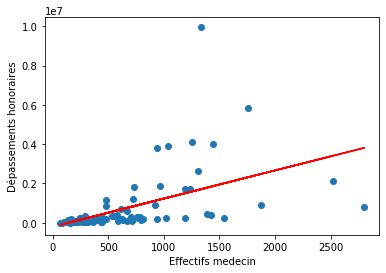

In [57]:
X_2 = Depassement_dep[['effectifs']]
Y_2 = Depassement_dep[['DEPASSEMENTS (Euros)']]

# Regression linéaire effectifs médecin, Dépassement honoraire
Reg = linear_model.LinearRegression()
model_1 = Reg.fit(X_2,Y_2)

# Création de nuage de points à partir de matplotlib
plt.figure()
plt.scatter(X_2, Y_2)
plt.plot(X_2,model_1.predict(X_2),color ='red')
plt.xlabel('Effectifs medecin')
plt.ylabel('Dépassements honoraires')

plt.show()

### Anesthésie et réanimation chirugicale:

In [61]:
Anesthesie = medecin[medecin.specialite.str.contains("Anesthésie-réanimation") == True]
Anesthesie_dep = Anesthesie.drop(columns=['mode_exercice','specialite'])
Anesthesie_dep['departement']=Anesthesie_dep['zone_inscription'].str.split(' - ').str[1]
Anesthesie_dep = Anesthesie_dep.drop(columns='zone_inscription').set_index('departement')

In [67]:
honoraire_a = pd.read_excel('/home/rakotoniaina/TELECOM PARIS/Notebook/INFMDI721/lesson6/honoraires.xls',sheet_name='Spécialistes')
honoraire_a = honoraire_a[honoraire_a['Spécialistes'].str.contains("02- Anesthésie-réanimation chirurgicale")]
honoraire_a = honoraire_a[honoraire_a['DEPARTEMENT'].str.contains("TOTAL") == False]

In [68]:
honoraire_a_dep = honoraire_a[['DEPARTEMENT','DEPASSEMENTS (Euros)']]
honoraire_a_dep['dep'] = honoraire_a['DEPARTEMENT'].str.split('- ').str[1]
honoraire_a_dep = honoraire_a_dep.drop(columns='DEPARTEMENT')
honoraire_a_dep_dep = honoraire_a_dep.set_index('dep')

/home/rakotoniaina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [72]:
pop_anesthesiste = pd.concat([Anesthesie_dep, population_dep,honoraire_a_dep_dep], axis=1, sort=False)

In [75]:
Depassement_dep_anest = pop_anesthesiste.dropna()
Depassement_dep_anest = Depassement_dep_anest[Depassement_dep_anest['DEPASSEMENTS (Euros)'] != 'nc']

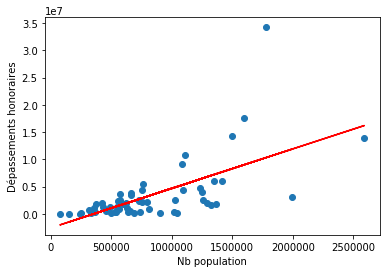

In [78]:
# Linear Regression : 
X_3 = Depassement_dep_anest[['value']]
Y_3 = Depassement_dep_anest[['DEPASSEMENTS (Euros)']]

# Regression linéaire effectifs médecin, Dépassement honoraire
Reg = linear_model.LinearRegression()
model = Reg.fit(X_3,Y_3)

# Création de nuage de points à partir de matplotlib
plt.figure()
plt.scatter(X_3, Y_3)
plt.plot(X_3,model.predict(X_3),color ='red')
plt.xlabel('Nb population')
plt.ylabel('Dépassements honoraires')

plt.show()


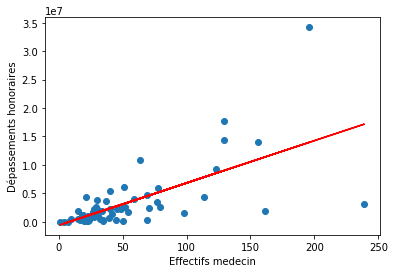

In [79]:
X_4 = Depassement_dep_anest[['effectifs']]
Y_4 = Depassement_dep_anest[['DEPASSEMENTS (Euros)']]

# Regression linéaire effectifs médecin, Dépassement honoraire
Reg = linear_model.LinearRegression()
model_4 = Reg.fit(X_4,Y_4)

# Création de nuage de points à partir de matplotlib
plt.figure()
plt.scatter(X_4, Y_4)
plt.plot(X_4,model_4.predict(X_4),color ='red')
plt.xlabel('Effectifs medecin')
plt.ylabel('Dépassements honoraires')

plt.show()